**This Notebook is based on Dataquest's Text Analysis Code and Tutorial**

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [0]:
import os
import csv

In [57]:
from google.colab import files
uploaded = files.upload()

Saving articles1.csv to articles1.csv


In [0]:
pt1= pd.read_csv('/content/articles1.csv', index_col=0)

In [60]:
pt1.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [61]:
len(pt1)

50000

In [63]:
print(pt1)

          id  ...                                            content
0      17283  ...  WASHINGTON  —   Congressional Republicans have...
1      17284  ...  After the bullet shells get counted, the blood...
2      17285  ...  When Walt Disney’s “Bambi” opened in 1942, cri...
3      17286  ...  Death may be the great equalizer, but it isn’t...
4      17287  ...  SEOUL, South Korea  —   North Korea’s leader, ...
...      ...  ...                                                ...
53287  73465  ...  As chairman and CEO of ExxonMobil, Rex Tillers...
53288  73466  ...  I’ve spent nearly 20 years looking at intellig...
53289  73467  ...    Donald Trump will not be taking necessary st...
53290  73468  ...  Dozens of   colleges could be forced to close ...
53291  73469  ...  The force of gravity can be described using a ...

[50000 rows x 9 columns]


In [64]:
pt1.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic'], dtype=object)

In [65]:
print(pt1['year'].min())
pt1['year'].max()

2011.0


2017.0

In [71]:
print(pt1)

          id  ...                                            content
0      17283  ...  WASHINGTON  —   Congressional Republicans have...
1      17284  ...  After the bullet shells get counted, the blood...
2      17285  ...  When Walt Disney’s “Bambi” opened in 1942, cri...
3      17286  ...  Death may be the great equalizer, but it isn’t...
4      17287  ...  SEOUL, South Korea  —   North Korea’s leader, ...
...      ...  ...                                                ...
53287  73465  ...  As chairman and CEO of ExxonMobil, Rex Tillers...
53288  73466  ...  I’ve spent nearly 20 years looking at intellig...
53289  73467  ...    Donald Trump will not be taking necessary st...
53290  73468  ...  Dozens of   colleges could be forced to close ...
53291  73469  ...  The force of gravity can be described using a ...

[50000 rows x 9 columns]


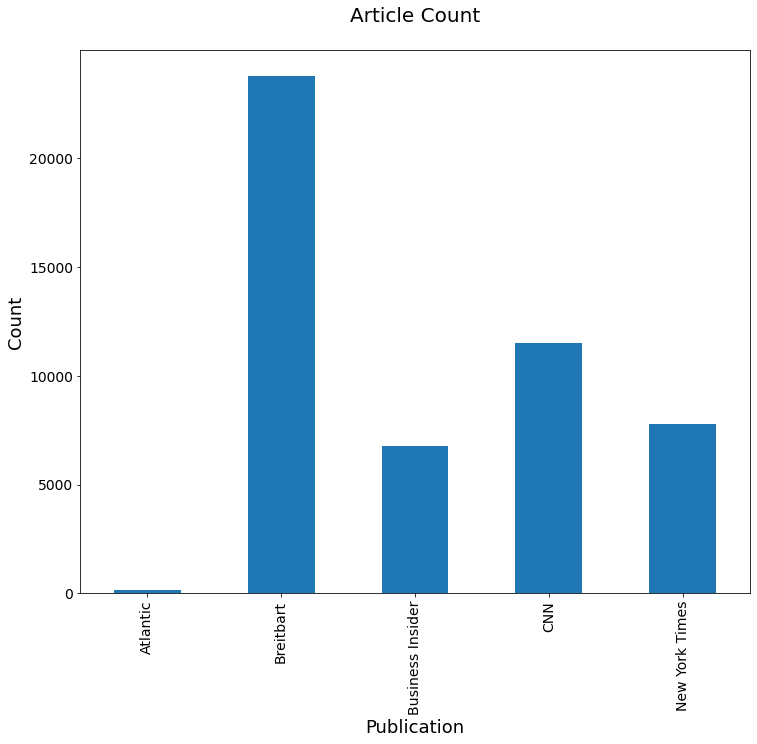

In [72]:
ax = pt1['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [73]:
ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

TypeError: ignored

Text(0, 0.5, 'Count')

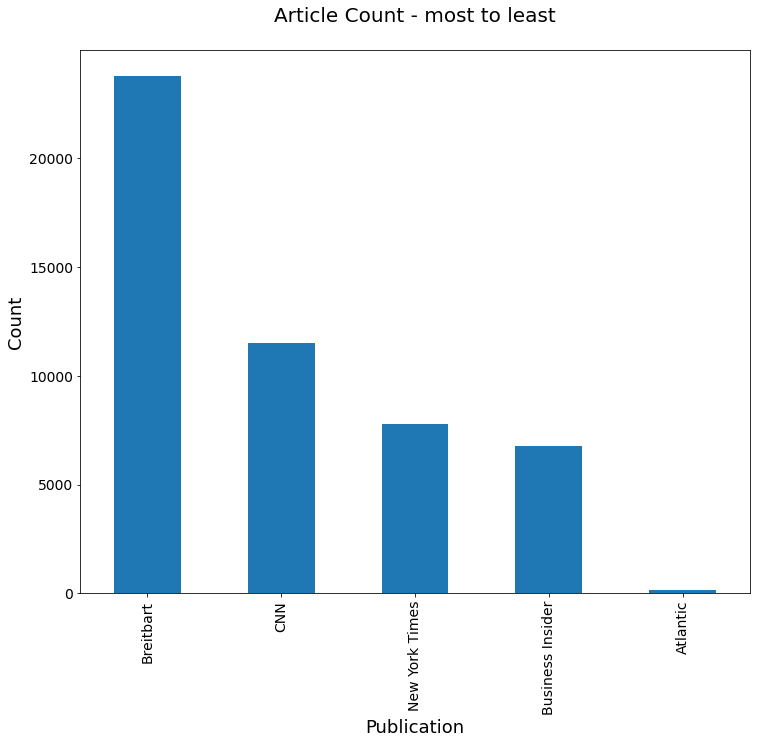

In [74]:
ax = pt1['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Article Count - most to least\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18)

In [0]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [76]:
pt1['tokenized'] = pt1['content'].map(lambda x: clean_text(x))
pt1['tokenized'].head()

0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object

In [78]:
pt1['num_wds'] = pt1['tokenized'].apply(lambda x: len(x.split()))
pt1['num_wds'].mean()

636.26046

In [80]:
pt1['num_wds'].max()

24736

In [82]:
len(pt1[pt1['num_wds']==0])

65

In [85]:
pt1 = pt1[pt1['num_wds']>0]
pt1['num_wds'].mean()
pt1['num_wds'].min()

1

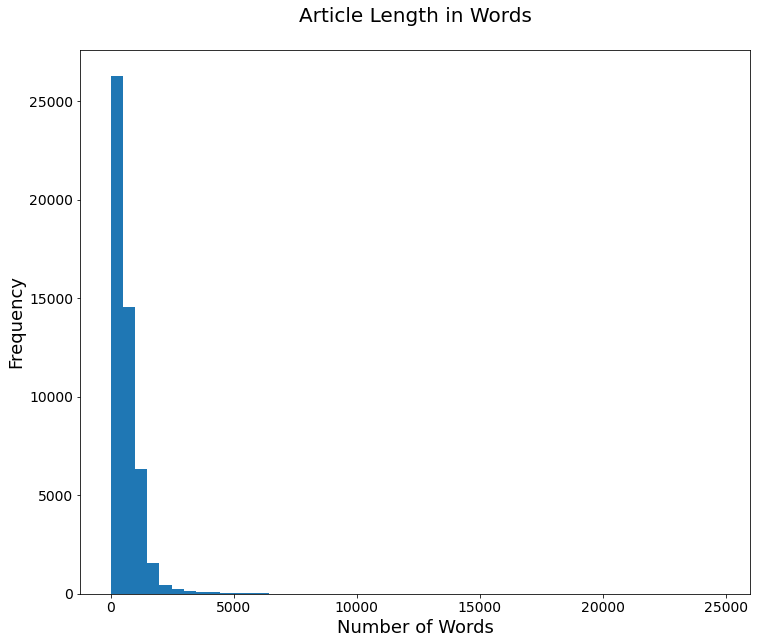

In [87]:
ax=pt1['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [89]:
set('b ac b'.split())

{'ac', 'b'}

In [91]:
pt1['uniq_wds'] = pt1['tokenized'].str.split().apply(lambda x: len(set(x)))
pt1['uniq_wds'].head()

0     389
1    1403
2     920
3    1037
4     307
Name: uniq_wds, dtype: int64

In [92]:
pt1['uniq_wds'].mean()
pt1['uniq_wds'].min()
pt1['uniq_wds'].max()

4584

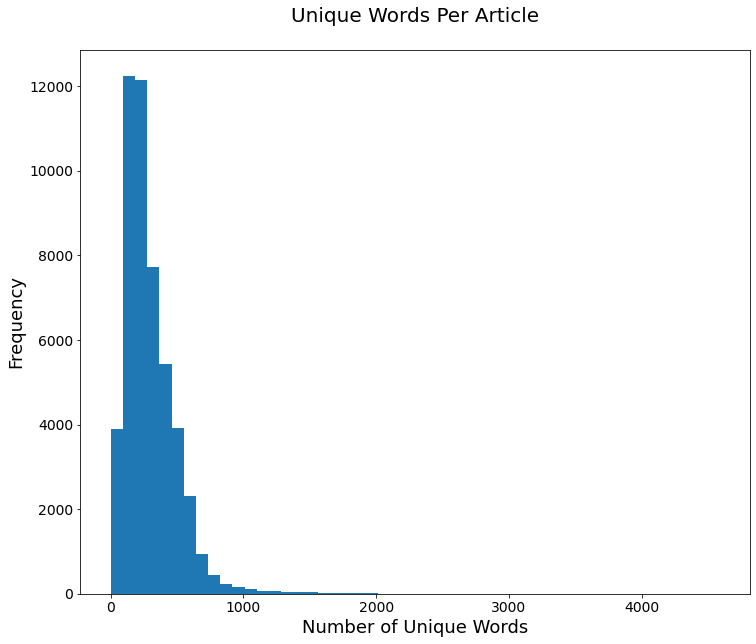

In [93]:
ax=pt1['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

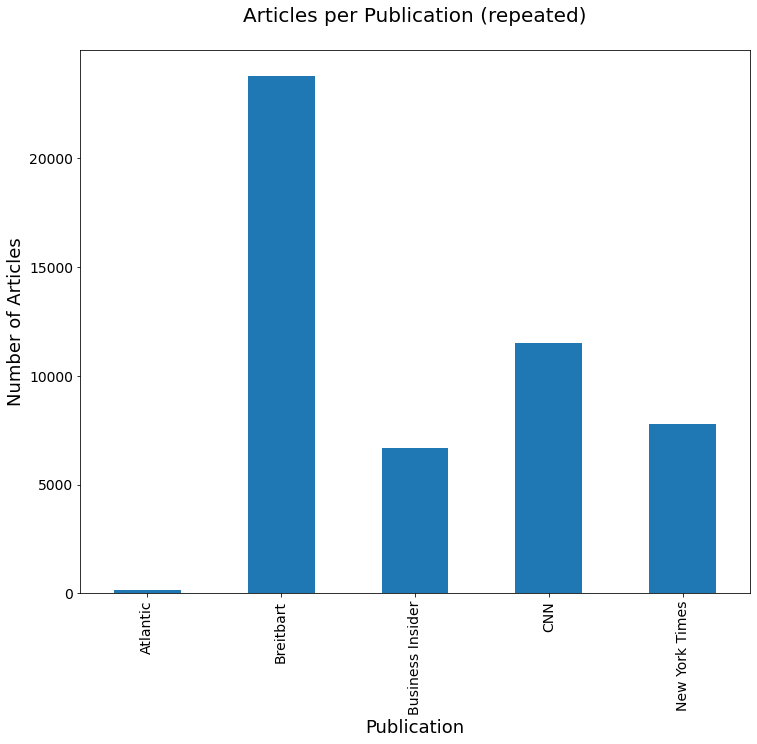

In [94]:
art_grps = pt1.groupby('publication')

ax=art_grps['title'].aggregate(len).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Articles per Publication (repeated)\n', fontsize=20)
ax.set_ylabel('Number of Articles', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

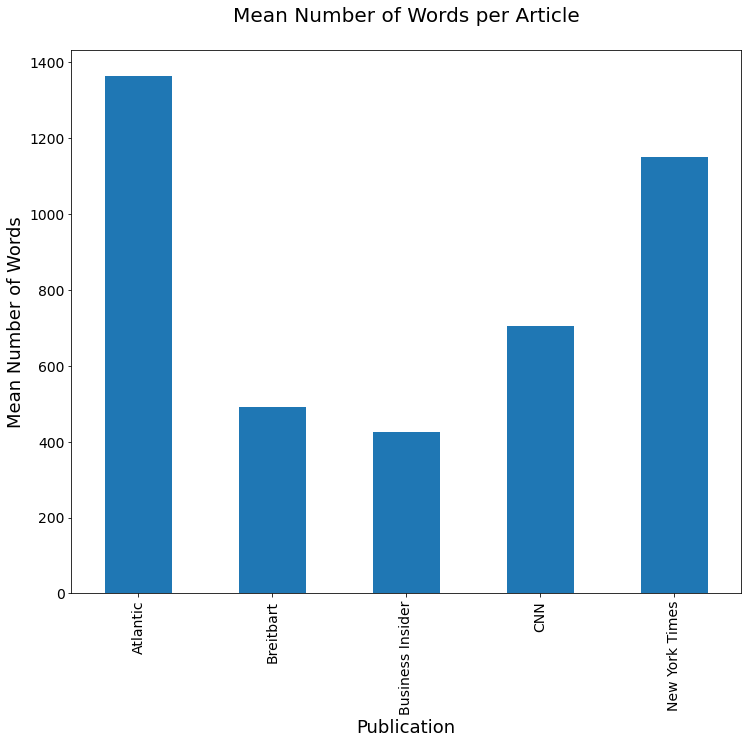

In [95]:
ax=art_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Number of Words per Article\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

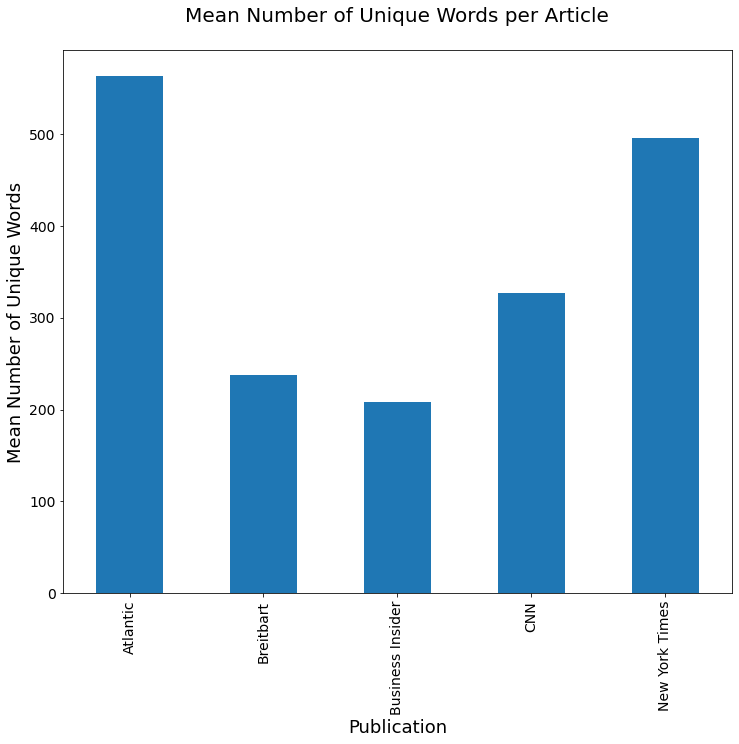

In [96]:
ax=art_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Number of Unique Words per Article\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

In [0]:
wd_counts = Counter()
for i, row in pt1.iterrows():
    wd_counts.update(row['tokenized'].split())

In [109]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [110]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [112]:
wd_counts.most_common(20)

[('said', 208089),
 ('trump', 119716),
 ('mr', 86543),
 ('one', 76224),
 ('people', 75933),
 ('would', 74880),
 ('new', 63047),
 ('president', 57729),
 ('also', 57465),
 ('like', 51319),
 ('clinton', 43778),
 ('time', 42249),
 ('state', 39875),
 ('first', 39639),
 ('could', 38857),
 ('two', 38767),
 ('years', 38195),
 ('us', 37624),
 ('news', 36740),
 ('states', 36302)]

In [0]:
def find_cc_wds(content, cc_wds=['climate change','global warming', 'extreme weather', 'greenhouse gas'
                                 'clean energy', 'clean tech', 'renewable energy']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    if not found:
        disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate) | (climate\W+(?:\w+\W+){1,5}?chang)')
        if disj.match(content):
            found = True
    return found

In [115]:
pt1['cc_wds'] = pt1['tokenized'].apply(find_cc_wds)
pt1['cc_wds'].head()

0    False
1    False
2    False
3    False
4    False
Name: cc_wds, dtype: bool

In [117]:
pt1['cc_wds'].sum() / len(pt1)

0.024271553018924603

In [118]:
art_grps['cc_wds'].sum()

publication
Atlantic             21.0
Breitbart           471.0
Business Insider    107.0
CNN                 274.0
New York Times      339.0
Name: cc_wds, dtype: float64

In [119]:
art_grps.count()

,id,title,author,date,year,month,url,content,tokenized,num_wds,uniq_wds,cc_wds
publication,,,,,,,,,,,,
Atlantic,171,171,171,171,171,171,0,171,171,171,171,171
Breitbart,23781,23781,23781,23781,23781,23781,0,23781,23781,23781,23781,23781
Business Insider,6695,6695,4926,6695,6695,6695,0,6695,6695,6695,6695,6695
CNN,11485,11485,7024,11485,11485,11485,0,11485,11485,11485,11485,11485
New York Times,7803,7803,7767,7803,7803,7803,0,7803,7803,7803,7803,7803


In [120]:
proportions = art_grps['cc_wds'].sum() / art_grps['cc_wds'].count()
proportions.sort_values(ascending=True)
proportions

publication
Atlantic            0.122807
Breitbart           0.019806
Business Insider    0.015982
CNN                 0.023857
New York Times      0.043445
Name: cc_wds, dtype: float64

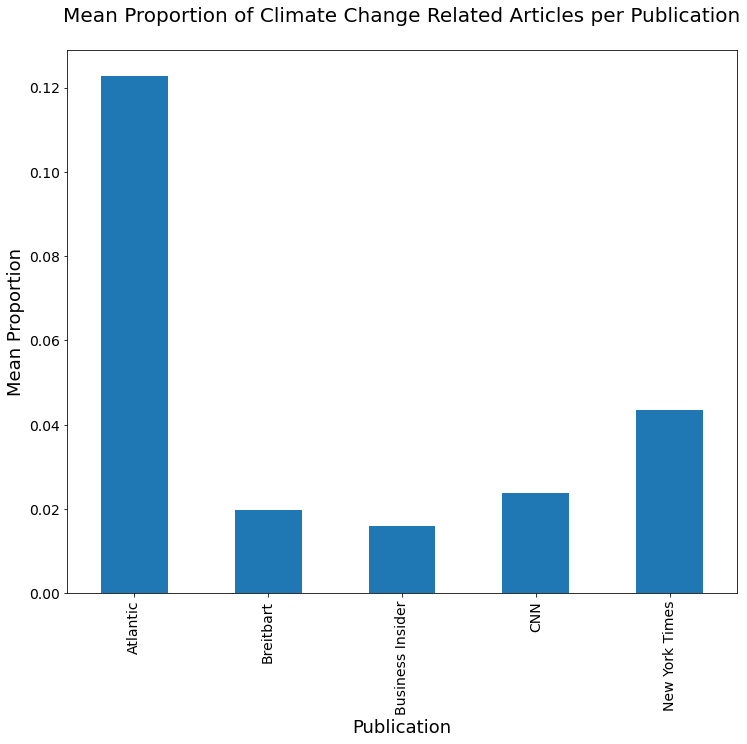

In [121]:
ax=proportions.plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Mean Proportion of Climate Change Related Articles per Publication\n', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=18)
ax.set_xlabel('Publication', fontsize=18);

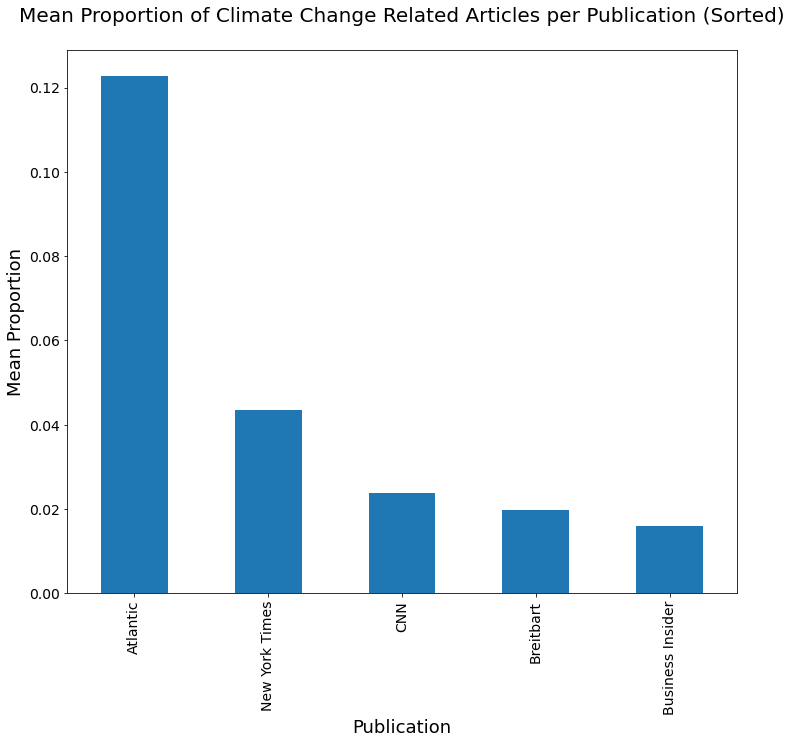

In [124]:
#liberal, conservative, and center
bias_assigns = {'Atlantic': 'left', 'Breitbart': 'right', 'Business Insider': 'left', 'Buzzfeed News': 'left', 'CNN': 'left', 'Fox News': 'right',
                'Guardian': 'left', 'National Review': 'right', 'New York Post': 'right', 'New York Times': 'left',
                'NPR': 'left', 'Reuters': 'center', 'Talking Points Memo': 'left', 'Washington Post': 'left', 'Vox': 'left'}
pt1['bias'] = pt1['publication'].apply(lambda x: bias_assigns[x])
pt1.head()

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds,uniq_wds,cc_wds,bias
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876,389,False,left
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743,1403,False,left
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350,920,False,left
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104,1037,False,left
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690,307,False,left


In [0]:
bias_groups = pt1.groupby('bias')
bias_proportions = bias_groups['cc_wds'].sum() / bias_groups['cc_wds'].count()

In [127]:
bias_groups['cc_wds'].count()

bias
left     26154
right    23781
Name: cc_wds, dtype: int64

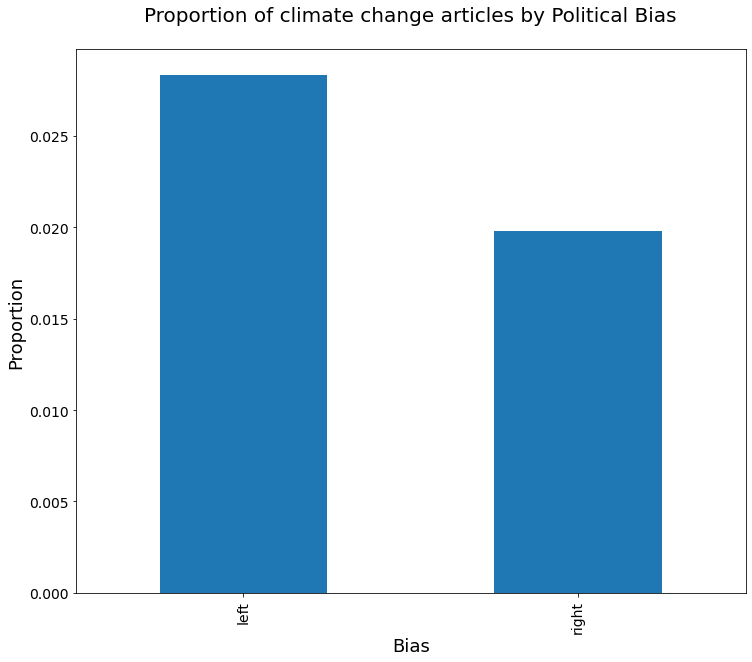

In [128]:
ax=bias_proportions.plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Proportion of climate change articles by Political Bias\n', fontsize=20)
ax.set_xlabel('Bias', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18);

In [0]:
def standard_err(p1, n1, p2, n2):
    return np.sqrt((p1* (1-p1) / n1) + (p2 * (1-p2) / n2))

In [0]:
def ci_range(diff, std_err, cv=1.96):
    return (diff - cv * std_err, diff + cv * std_err)

In [0]:
def calc_ci_range(p1, n1, p2, n2):
    std_err = standard_err(p1, n1, p2, n2)
    diff = p1-p2
    return ci_range(diff, std_err)

In [0]:
left = bias_groups.get_group('left')
right = bias_groups.get_group('right')

In [134]:
calc_ci_range(bias_proportions['left'], len(left), bias_proportions['right'], len(right))

(0.005846962925563638, 0.011205955114432724)

In [0]:
bias_assigns = {'Atlantic': 'left', 'Breitbart': 'right', 'Business Insider': 'center', 'Buzzfeed News': 'left', 'CNN': 'left', 'Fox News': 'right',
                'Guardian': 'left', 'National Review': 'right', 'New York Post': 'center', 'New York Times': 'left',
                'NPR': 'center', 'Reuters': 'center', 'Talking Points Memo': 'left', 'Washington Post': 'left', 'Vox': 'left'}
pt1['bias'] = pt1['publication'].apply(lambda x: bias_assigns[x])
bias_groups = pt1.groupby('bias')
bias_proportions = bias_groups['cc_wds'].sum() / bias_groups['cc_wds'].count()

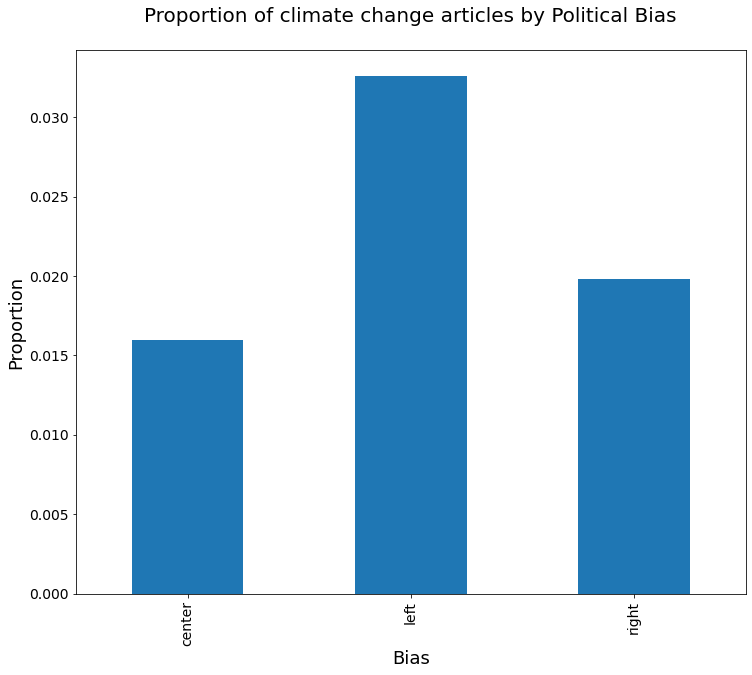

In [138]:
ax=bias_proportions.plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Proportion of climate change articles by Political Bias\n', fontsize=20)
ax.set_xlabel('Bias', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18);

In [139]:
center = bias_groups.get_group('center')
left = bias_groups.get_group('left')
right = bias_groups.get_group('right')
calc_ci_range(bias_proportions['left'], len(left), bias_proportions['right'], len(right))

(0.009716397237703093, 0.015834797913451788)

In [140]:
calc_ci_range(bias_proportions['left'], len(left), bias_proportions['center'], len(center))

(0.012694557277610478, 0.020503940043560515)

In [141]:
calc_ci_range(bias_proportions['center'], len(center), bias_proportions['right'], len(right))

(-0.00731077555433417, -0.000336526615681944)

In [0]:
own_assigns = {'Atlantic': 'non-profit', 'Breitbart': 'LLC', 'Business Insider': 'corp', 'Buzzfeed News': 'private',
               'CNN': 'corp', 'Fox News': 'corp',
                'Guardian': 'LLC', 'National Review': 'non-profit', 'New York Post': 'corp', 'New York Times': 'corp',
                'NPR': 'non-profit', 'Reuters': 'corp', 'Talking Points Memo': 'private', 'Washington Post': 'LLC', 'Vox': 'private'}
pt1['ownership'] = pt1['publication'].apply(lambda x: own_assigns[x])
owner_groups = pt1.groupby('ownership')
owner_proportions = owner_groups['cc_wds'].sum() / owner_groups['cc_wds'].count()

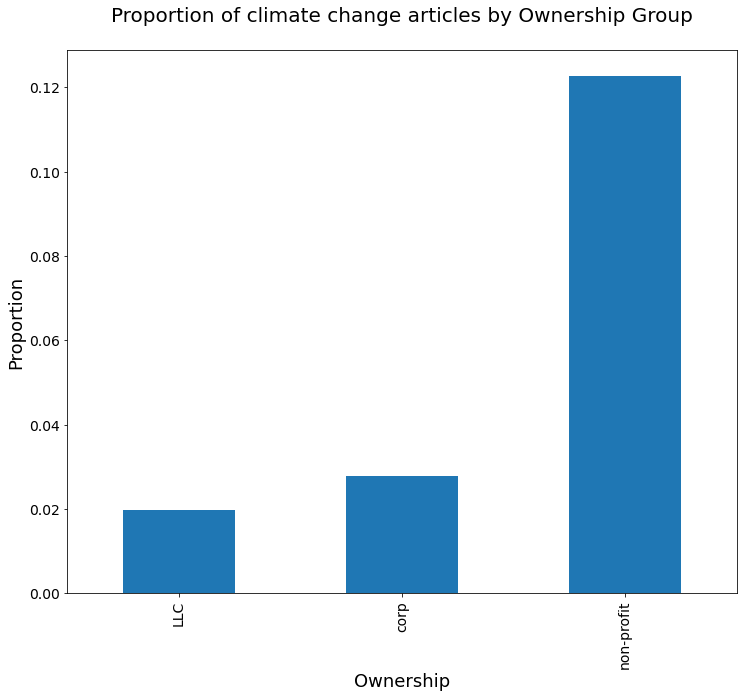

In [143]:
ax=owner_proportions.plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('Proportion of climate change articles by Ownership Group\n', fontsize=20)
ax.set_xlabel('Ownership', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18);